<a href="https://colab.research.google.com/github/jinhuioh/hi_ai_himedia/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML/DL 컨텐츠기반 개인 추천시스템 구현.
## 구현: 상품을 산 경우, 구매한 상품과 같은 카테고리의 상품 중 구매수 상위 N개 추출 -> 이미지 추천
## 참고사이트
### https://romg2.github.io/mlguide/01_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-09.-%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%BD%98%ED%85%90%EC%B8%A0-%EA%B8%B0%EB%B0%98/

In [1]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
#앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
from xgboost import  XGBClassifier
from lightgbm import  LGBMClassifier

In [2]:
#코렙한글쓰기.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 
#!apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

In [3]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [4]:
#fm._rebuild()

Text(0.5, 1.0, '안녕하세요')

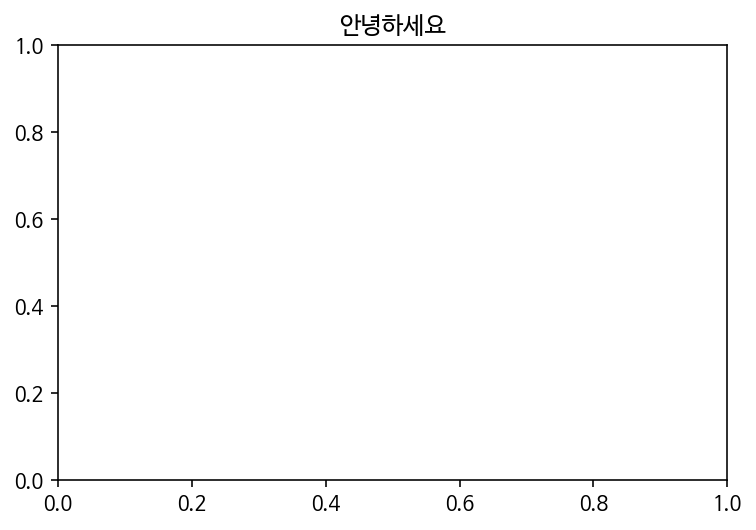

In [5]:
plt.title('안녕하세요')

## 데이터로딩, 가공


In [6]:
df = pd.read_excel('/content/추천시스템분석데이터(협업,컨텐츠).xlsx')
df.head()

,info_idx,product_idx,payment_method,user_id,payment_total,recipient_info,recipient_addr,purchase_product,purchase_quantity,payment_date
0,1,1,신용카드,1234,49900,jinhui99,서울시 용산구,[NF] 핀턱 아일렛 원피스 (CHARCOAL)_F22QD321,5,2022-04-19 23:16:51
1,2,3,신용카드,aaaaaa1234,49900,jinhui99,서울시 용산구,핀턱 셔츠 롱 원피스 레이온블랙 MDOP043RNBLACK,3,2022-04-19 23:29:35
2,3,4,무통장입금,ad123,49900,addr,서울시 용산구,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블랙],3,2022-04-19 23:29:37
3,4,5,무통장입금,addr,49900,user1,경기도 군포,[쿨탠다드] 우먼즈 피케 폴로 원피스 [네이비],4,2022-04-19 23:44:11
4,5,6,신용카드,admin,49900,rtavnerlu,경기도 부천,라이 맥시 롱 원피스 black[블랙],5,2022-04-19 23:48:22


In [7]:
df.shape

(802, 10)

In [8]:
#카테고리 추출
#특정 카테고리와 유사도가 높은 카테고리를 얻기 위한 함수 생성.
#해당카테고리 구매수 상위 count 5개

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
#리스트 객체를 문자열로 변경후 Count 피처 벡터화를 적용하였다.

In [11]:
df.columns

Index(['info_idx', 'product_idx', 'payment_method', 'user_id', 'payment_total',
       'recipient_info', 'recipient_addr', 'purchase_product',
       'purchase_quantity', 'payment_date'],
      dtype='object')

# 상품이름(카테고리) 유사도 측정

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:

# CountVectorizer
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(df['purchase_product'])

In [15]:

genre_mat.shape

(802, 1773)

리스트 객체 문자열로 변경 후 Count 피처 벡터화 적용

In [16]:

from sklearn.metrics.pairwise import cosine_similarity

In [17]:
genre_sim = cosine_similarity(genre_mat, genre_mat)
genre_sim[0]

array([1.        , 0.20100756, 0.09090909, 0.09090909, 0.10050378,
       0.09090909, 0.09090909, 0.09090909, 0.        , 0.10050378,
       0.        , 0.11396058, 0.10050378, 0.        , 0.10050378,
       0.10050378, 0.10050378, 1.        , 0.        , 0.        ,
       0.09090909, 0.13483997, 0.        , 0.07784989, 0.        ,
       0.        , 0.09090909, 0.0836242 , 0.11396058, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.10050378, 0.10050378,
       0.        , 0.        , 0.0836242 , 0.        , 0.        ,
       0.11396058, 0.        , 0.        , 0.11396058, 0.09090909,
       0.        , 0.10050378, 0.        , 0.10050378, 0.        ,
       0.        , 0.13483997, 0.10050378, 0.10050378, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
def find_sim_movie(df, sim_matrix, title_name, top_n=10):
    
    # 입력한 영화의 index
    title_movie = df[df['purchase_product'] == title_name]
    title_index = title_movie.index.values
    
    # 입력한 영화의 유사도 데이터 프레임 추가
    df["similarity"] = sim_matrix[title_index, :].reshape(-1,1)
    
    # 유사도 내림차순 정렬 후 상위 index 추출
    temp = df.sort_values(by="similarity", ascending=False)
    final_index = temp.index.values[ : top_n]
    
    return df.iloc[final_index]

In [20]:
# Spider-Man 3(스파이더맨 3)와 장르별 유사도가 높은 영화 10개
similar_movies = find_sim_movie(df, genre_sim, '엔젤 와펜 후드 블랙', 10)
similar_movies[['purchase_product', 'vote_average', "similarity"]]

IndexError: ignored